# Exploratory Data Analysis Project

How is salary affected by gender, race, education, years in employment, years in education, marital status and number of dependents?

The dataset used in this project were released by providers free of charge into the public domain. This analysis will follow the data analytics lifecycle to uncover correlations and build regression models with all relevant factors.

## Preparation

Import necessary packages for analysis

In [1]:
import pandas as pd #data processing i.e. CSV file
import statsmodels.api as sm #for statistical computations
%matplotlib inline

In [2]:
from bokeh.io import output_notebook #for visualisation
output_notebook()

from bokeh.plotting import figure
from bokeh.io import show

Loading BokehJS ...

Load the dataset from the CSV file
*Using pandas package*

In [8]:
df = pd.read_csv("wage1 (1).csv")

**Overview of dataset**

print the first 3 rows to see an summary of the data

In [9]:
df.head(4)

,Unnamed: 0,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,0,True,3.24,12,2,3,female,white
1,1,False,3.00,11,0,2,male,white
2,2,True,6.00,8,28,0,male,white
3,3,True,5.30,12,2,1,male,white


As we can see from the table view of the data, the second column 'Unnamed:0' is not useful for this analysis as it is as is a duplication of the first column. The 'Unnamed:0' column will be deleted.

In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)

To check that the 'Unnamed:0' column has been removed, print the first 4 rows

In [11]:
df.head(4)

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,True,3.24,12,2,3,female,white
1,False,3.00,11,0,2,male,white
2,True,6.00,8,28,0,male,white
3,True,5.30,12,2,1,male,white


## Descriptive Analysis

For the purpose of the assignment, descriptive analysis will be carried out on columns will numerical values

In [13]:
df.describe()

,hourly_wage,years_in_education,years_in_employment,num_dependents
count,525.000000,525.000000,525.000000,525.000000
mean,5.901429,12.565714,5.114286,1.041905
std,3.694586,2.770821,7.227907,1.262403
min,0.530000,0.000000,0.000000,0.000000
25%,3.330000,12.000000,0.000000,0.000000
50%,4.650000,12.000000,2.000000,1.000000
75%,6.880000,14.000000,7.000000,2.000000
max,24.980000,18.000000,44.000000,6.000000


The table above provides the following observations:
* The mean hourly wage is 5.90, which means the average hourly wage for the sample dataset is £5.90/hour
* The quartile figures suggests that at least 50% of individuals spent 2 years in employment and 12 years in education
* 75% of individuals have at least 2 dependents

How many rows and columns are there?

In [14]:
df.shape #(n rows, n cols)

(525, 7)

There is data on 524 individuals represented in 7 columns.

What are the data types in each of the columns?

In [15]:
df.dtypes

married                   bool
hourly_wage            float64
years_in_education       int64
years_in_employment      int64
num_dependents           int64
gender                  object
race                    object
dtype: object

How many male and female individuals are in the sample?

In [16]:
df.gender.value_counts()

male      274
female    251
Name: gender, dtype: int64

How many male and female individuals are in the sample, in percent?

In [17]:
df.gender.value_counts(normalize=True)

male      0.521905
female    0.478095
Name: gender, dtype: float64

We can see that 52 percent are men whilst 47 percent are female

How many are non-white and white? also in percent?

In [18]:
df.race.value_counts()

white       471
nonwhite     54
Name: race, dtype: int64

In [19]:
df.race.value_counts(normalize=True)

white       0.897143
nonwhite    0.102857
Name: race, dtype: float64

How many are married and not married among male and female?

In [20]:
pd.crosstab(df.gender, df.married)

married,False,True
gender,,
female,119,132
male,86,188


Percent of married among male and female

In [21]:
pd.crosstab(df.gender, df.married, normalize="index")

married,False,True
gender,,
female,0.474104,0.525896
male,0.313869,0.686131


How many have no dependents and are married and not married?

In [22]:
df[df.num_dependents <= 0]['married'].value_counts()

True     129
False    123
Name: married, dtype: int64

There are 129 individuals who are married and have no dependents. There are 123 individuals who are not married and have no dependents

Average hourly wage for those who are married

In [23]:
df[df['married'] == 1]['hourly_wage'].mean()

6.5734687500000035

Average hourly wage for those who are not married

In [24]:
df[df['married'] == 0]['hourly_wage'].mean()

4.852390243902436

## Visualisation

Create a line plot showing relationship between years in education and hourly wage variables.

In [25]:
x = df.years_in_education
y = df.hourly_wage
p = figure(title="line plot", x_axis_label='years in education', y_axis_label='hourly wage')
p.scatter(x,y)
show(p)

Create a line plot showing relationship between years in employment and hourly wage variables

In [26]:
x = df.years_in_employment
y = df.hourly_wage
p = figure(title="line plot", x_axis_label='years in employment', y_axis_label='hourly wage')
p.scatter(x,y)
show(p)

## Data Cleansing

Check to see if the data has any missing values

In [27]:
df.isnull().values.any()

False

Above output as 'false', indicates that there are no missing values in the dataset

To double check this, we can retrieve the total count of missing values. As the above result shows there are no missing values, the total should be zero.

In [28]:
df.isnull().sum().sum()

0

## Visualise the distribution of the data

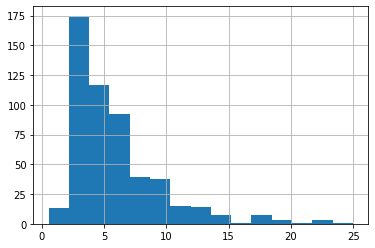

In [29]:
df.hourly_wage.hist(bins=15)

The plot shows that there are a majority of individuals who are paid between 0 and £10 an hour, whereas there are a few who are paid over £10 an hour

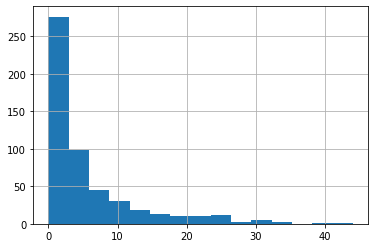

In [30]:
df.years_in_employment.hist(bins=15)

The plot shows that there are a majority of individuals spent less than 5 years in employment, whereas there are a few who spent over 20 years in employment

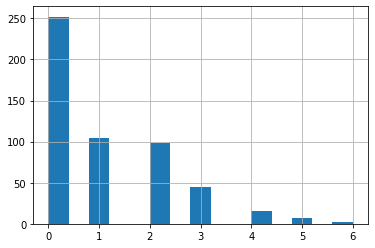

In [31]:
df.num_dependents.hist(bins=15)

We can see from the plot that majority of the individuals in the sample dataset has no dependents

### Unique Values

What are the different races displayed in the datafile?

In [32]:
df.race.unique()

array(['white', 'nonwhite'], dtype=object)

### Chi-Sqaure Tests

Determine whether two categorical variables are independent; race and gender

In [33]:
from scipy import stats

## Contigency table

Build a contingency table of two potentially related categorical variables. Conduct a statistical test of
the independence between the variables.

In [34]:
cont_table = pd.crosstab(df['race'], df['gender'])
#print the contigency table
cont_table

gender,female,male
race,,
nonwhite,25,29
white,226,245


The contigency table indicates that there are 25 females and 29 males who are non-white and there are 226 females and 245 males who are white.

**Visualise contigency table as stacked bars**

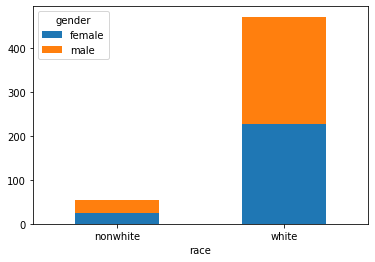

In [35]:
cont_table.plot(kind="bar", stacked=True, rot=0)

The plot suggests that males take up the greater share of individuals who are of both the nonwhite and white race. 
The plot visualises the significance in the difference in the count of individuals are white versus nonwhite

The plot suggests that males take up the greater share of individuals who are of both the nonwhite and white race. The plot visualises the significance in the difference in the count of individuals are white versus nonwhite.

**Hypothesis testing on contigency table**

In [36]:
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)
print(f"p-value: {p_val}")

p-value: 0.9273203960026662


The p-value is greater than the significance level of 0.05.
Therefore, **we accept the null hypothesis that there is no dependence between gender and race**.
It appears that there is a change in gender for example will not have an effect on race

## Working on a subset of data

Retrieve a subset of the data based on two or more criteria and present descriptive statistics on the
subs

Retrieve a subset of the data based on two or more criteria and present descriptive statistics on the
subset

The first subset retrieved will contain individuals that have no dependencies and have been in education for 12 years and above.

In [37]:
#retrieve the first subset; df_dependedu
df_dependedu = df[(df.num_dependents == 0) & (df.years_in_education <=12)]
df_dependedu

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
2,True,6.00,8,28,0,male,white
6,False,5.00,12,3,0,female,white
12,False,5.50,12,3,0,male,white
15,True,7.50,12,0,0,female,white
18,True,4.50,12,6,0,female,white
...,...,...,...,...,...,...,...
491,False,3.28,12,2,0,female,white
499,False,2.90,12,2,0,female,white
509,False,3.00,12,1,0,female,nonwhite
515,False,3.08,12,1,0,male,white


The second subset retrieved will contain individuals that have no dependencies and have been in employment for 2 years or less

In [38]:
#retrieve the second subset; df_dependemp
df_dependemp = df[(df.num_dependents == 0) & (df.years_in_employment <=2)]
df_dependemp

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
9,False,6.25,16,2,0,female,white
10,False,8.13,13,0,0,female,white
15,True,7.50,12,0,0,female,white
22,False,0.53,12,1,0,female,white
26,True,12.50,16,0,0,male,white
...,...,...,...,...,...,...,...
509,False,3.00,12,1,0,female,nonwhite
515,False,3.08,12,1,0,male,white
518,True,4.75,13,1,0,male,white
519,False,5.65,12,0,0,male,white


### Descriptive statistics on both subsets of data

In [39]:
#first subset
df_dependedu.describe()

,hourly_wage,years_in_education,years_in_employment,num_dependents
count,136.000000,136.000000,136.000000,136.0
mean,5.174485,10.963235,6.205882,0.0
std,2.470501,2.099058,8.642803,0.0
min,0.530000,0.000000,0.000000,0.0
25%,3.345000,11.000000,0.000000,0.0
50%,4.500000,12.000000,2.000000,0.0
75%,6.250000,12.000000,8.000000,0.0
max,15.000000,12.000000,44.000000,0.0


In [40]:
#second subset
df_dependemp.describe()

,hourly_wage,years_in_education,years_in_employment,num_dependents
count,135.000000,135.000000,135.000000,135.0
mean,5.319037,13.259259,0.688889,0.0
std,2.607490,2.446328,0.832786,0.0
min,0.530000,4.000000,0.000000,0.0
25%,3.500000,12.000000,0.000000,0.0
50%,4.550000,12.000000,0.000000,0.0
75%,6.250000,16.000000,1.000000,0.0
max,18.000000,18.000000,2.000000,0.0


Mean value for hourly_wage in the df_dependedu subset

In [41]:
dependedu = df_dependedu['hourly_wage']

# mean hourly wage
dependedu.mean()

5.174485294117646

Mean value for hourly_wage in the df_dependemp subset

In [42]:
dependemp = df_dependemp['hourly_wage']

# mean hourly wage
dependemp.mean()

5.3190370370370355

The mean values for the hourly wages are of similar value. We will carry out an independent-two-sample test that determines whether there is a significant difference between the means of the two populations from which the samples are drawn.

In [43]:
#INDEPENDENT-TWO-SAMPLE-TEST
t_val, p_val = stats.ttest_ind(dependedu, dependemp)

# obtain a one-tail p-value
p_val /= 2

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: -0.4684881173985334, p-value: 0.31990748356043197


The p-value is greater than the significance level ( 𝛼=0.05 ), i.e., the difference between the two means falls outside the rejection area.
We accept the null hypothesis
The difference between the two means is such that there is more than 0.01% chance that the samples was drawn from  the same population.
We conclude that there is no significant difference in the the mean hourly wage for individuals who have no dependents plus spent less than 12 years in education and those who have no dependents plus spent less than 2 years in education

### Pivot Tables

Create a pivot table of the number of females and males that spent a specific number of years in employment

In [44]:
df.pivot_table(index='years_in_employment', columns='gender', values='race', aggfunc='count')

gender,female,male
years_in_employment,,
0,87.0,75.0
1,32.0,19.0
2,31.0,32.0
3,20.0,22.0
4,19.0,8.0
5,11.0,19.0
6,8.0,7.0
7,4.0,11.0
8,4.0,11.0


This table shows the count of males and females for every number of years in employment.
We can see that there is only one female in the dataset that spent over 27 years in employment, whereas a majority offemales spent less than 6 years in employment

In [45]:
df.pivot_table('hourly_wage', index='gender', columns='race')

race,nonwhite,white
gender,,
female,4.237600,4.632965
male,6.543448,7.165306


This pivot table gives some insight into the average hourly wage for individuals based on gender and race.
Overall, on average, white males are paid the highest hourly wage (mean value = 7.16), compared to nonwhite females who are paid the lowest hourly wage (mean value = 4.24). 

## Linear Regression

Linear regression model is a technique used to understand the factors that influence the hourly wage

In [46]:
model = sm.OLS.from_formula(
    'hourly_wage ~ married + years_in_education + years_in_employment + num_dependents + gender + race', data=df).fit()

review the summary of the model

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hourly_wage   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     49.80
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           2.71e-48
Time:                        20:32:21   Log-Likelihood:                -1311.0
No. Observations:                 525   AIC:                             2636.
Df Residuals:                     518   BIC:                             2666.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.1607      0.750     -4.216      0.000      -4.634      -1.688
married[T.True]         0.6266      0.282      2.225      0.026       0.073       1.180
gender[T.male]          1.7202      0.267      6.444      0.000       1.196       2.245
race[T.white]           0.0979      0.429      0.228      0.820      -0.745       0.940
years_in_education      0.5399      0.048     11.136      0.000       0.445       0.635
years_in_employment     0.1558      0.019      8.282      0.000       0.119       0.193
num_dependents          0.1088      0.107      1.014      0.311      -0.102       0.319
==============================================================================
Omnibus:                      187.184   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.583
Skew:                           1.612   Prob(JB):                    1.36e-154
Kurtosis:                       7.690   Cond. No.                         86.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation of output**

In this analysis, we want to know what explains or determines the hourly wage for an individual given their marital status, years in education, years in employment, race, gender and number of dependents.

* Coefficients on the variable: The model is defined by the line:
$hourly_wage = -3.1607 + 0.6265*married + 0.5399*years_in_education + 0.1557*years_in_employment + 0.1087*num_dependents + 1.72022*gender + 0.0978*race + e$.

* From the signs on the coefficients, it can be said that the hourly wage is positively affected by the marital status, years in employment, years in education, number of dependents, gender and race. This means that as the independent variables increase, the dependent variable also increases.

* Significance of the intercept and the coefficients
P-values are used to determine statistical significance. From evaluating the p-values from the table; 
    *  the intercept, years in employment
    *  years in education and gender are highly significant (p < 0.001)
    *  marital status is significant (p < 0.05)
    *  number of dependent and race are not significant (p > 0.05)

* Quality of the model: The adjusted R-squared value of 0.35 indicates that the data we have is not a very good fit for the model and that there are other factors that influence the hourly wage, in which our model does not take into account.

Assumptions of the normality and zero means of residuals

In [48]:
fig = figure(height=400, width=400)

# the x axis is the fitted values
# the y axis is the standardized residuals
st_resids = model.get_influence().resid_studentized_internal
fig.circle(model.fittedvalues, st_resids)

show(fig)

The residual plot shows that the residuals are not randomly scattered around zero which shows the assumptions of normality of the distribution of residuals are not valid for this model. There seems to be a cluster of residual values in the middle graph. 

In [49]:
import numpy as np

# create a histogram with 10 bins
hist, edges = np.histogram(st_resids, bins=10)

In [50]:
fig = figure(height=400, width=400)
fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
show(fig)

The histogram indicates that there are four outliers. This shows that the errors do not seem to be normally distributed

## Jarque-Bera Test

The p-value of the Jarque-Bera statistic is 1.36e-154. With this result we will reject the null hypothesis of the normal distribution of errors at both the 0.1 and 0.05 significance level. This also shows that the errors do not have a normal distribution